Autor: **Gabriel Leite Bessa**

Turma: **T1**

Disciplina: **Cálculo Númerico Computacional**

In [ ]:
import numpy as np
import math
from scipy import interpolate
import matplotlib.pyplot as plt

# Métodos

In [ ]:
def lagrange_method(xs:np.array, ys:np.array, x: float) -> float:
  """
  xs -> valores de x tabelados
  ys -> valores de y tabelados
  x  -> valor a interpolar
  """
  n = xs.shape[0]
  result = 0

  for k in range(0, n):
    c = 1
    d = 1
    for j in range(0, n):
      if k != j:
        c = c * (x - xs[j])
        d = d * (xs[k] - xs[j])
    result = result + ys[k] * c / d

  return result

In [ ]:
def newton_method(xs: np.array, ys: np.array, x: float) -> float:
  """
  xs -> valores de x tabelados
  ys -> valores de y tabelados
  x  -> valor a interpolar
  result -> valor interpolado
  """
  n = xs.shape[0]

  assert n > 0, "No value of xs passed"

  dely = ys.copy()

  for i in range(1, n):
    for k in range(n - 1, i - 1, -1):
      dely[k] = (dely[k] - dely[k - 1]) / (xs[k] - xs[k - i])

  result = dely[n - 1]

  for i in range(n - 2, -1, -1):
    result = result * (x - xs[i]) + dely[i]

  return result

In [ ]:
def linear_min_quadratic_method(xs: np.array, ys: np.array) -> np.array:
  n = xs.shape[0]

  sum_xy = np.add.reduce(np.multiply(xs, ys))
  sum_x = np.add.reduce(xs)
  sum_y = np.add.reduce(ys)
  sum_x_q = np.add.reduce(np.multiply(xs, xs))

  a = ((n * sum_xy) - (sum_x * sum_y)) / (n * sum_x_q - sum_x ** 2)
  b = (sum_x * sum_xy - sum_y * sum_x_q) / (sum_x ** 2 - n * sum_x_q)

  return np.array([a, b])

In [ ]:
def logarithm_min_quadratic_method(xs: np.array, ys: np.array) -> np.array:
  xs = np.log(xs)
  return linear_min_quadratic_method(xs, ys)

In [ ]:
def exp_min_quadratic_method(xs: np.array, ys: np.array) -> np.array:
  ys = np.log(ys)
  result = linear_min_quadratic_method(xs, ys)
  result[1] = np.exp(result[1])
  return result

In [ ]:
def power_min_quadratic_method(xs: np.array, ys: np.array) -> np.array:
  xs = np.log(xs)
  ys = np.log(ys)
  result = linear_min_quadratic_method(xs, ys)
  result[1] = np.exp(result[1])
  return result

In [ ]:
def linear_natural_spline(xs: np.array, ys: np.array) -> float:
  pass

In [ ]:
def quadratic_natural_spline(xs: np.array, ys: np.array) -> float:
  pass

In [ ]:
def cubic_natural_spline(xs: np.array, ys: np.array) -> float:
  pass

# Testes

In [ ]:
xs = np.array([20,
               30,
               40,
               50
], dtype=np.float32)
ys = np.array([0.99907,
               0.99826,
               0.99828,
               0.99878
], dtype=np.float32)
x = 25.0

print(round(lagrange_method(xs, ys, x), 5))
print(round(newton_method(xs, ys, x), 5))

0.99854
0.99854


In [ ]:
xs = np.array([-1, 0, 2], dtype=np.float32)
ys = np.array([4, 1, -1], dtype=np.float32)
x = 1.0

print(round(lagrange_method(xs, ys, x), 5))
print(round(newton_method(xs, ys, x), 5))

-0.66667
-0.66667


In [ ]:
f1 = lambda x: x ** 4
x0 = 0.5
x1 = 1

print(trapaze_area(x0, x1, f1(x0), f1(x1)))

0.265625


# Relatório 3

## Exercício 1

Usando interpolação de Netwon, construa o polinômio interpolador de grau 4 para estimar a população no ano de 1965.

In [ ]:
xs = np.array([1940, 1950, 1960, 1970, 1980], dtype=np.float32)
ys = np.array([132_165, 151_326, 179_323, 203_302, 226_542], dtype=np.float32)
x = 1965

print(f"População no ano de {x}: {round(newton_method(xs, ys, x), 3)}")

População no ano de 1965: 191987.929


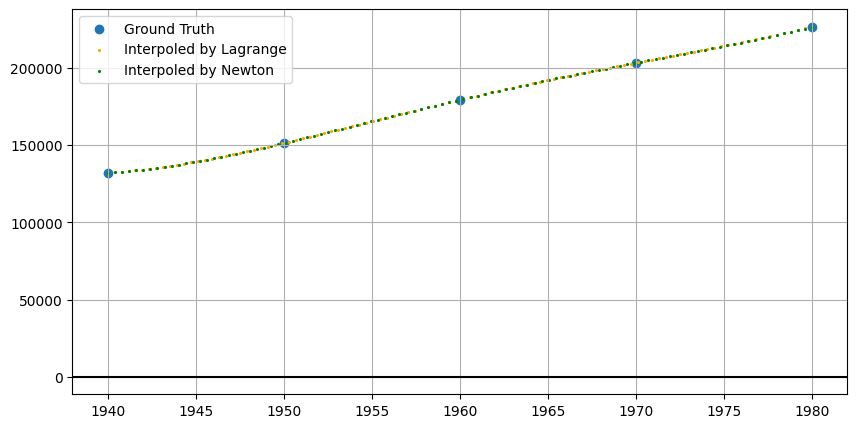

In [ ]:
xs_inter_lag = np.linspace(xs[0], xs[-1], 102)
ys_inter_lag = lagrange_method(xs, ys, xs_inter_lag)

xs_inter_newt = np.linspace(xs[0], xs[-1], 100)
ys_inter_newt = newton_method(xs, ys, xs_inter_newt)

fig = plt.figure(figsize=(10,5))
plt.axhline(y = 0, color="black")
plt.scatter(xs, ys, label="Ground Truth")
plt.scatter(xs_inter_lag, ys_inter_lag, s=1.5, label="Interpolated by Lagrange", color="orange")
plt.scatter(xs_inter_newt, ys_inter_newt, s=1.5, label="Interpolated by Newton", color="green")
plt.legend()
plt.grid()
plt.show()

### Conclusões



## Exercício 2

In [ ]:
xs = np.array([0, 10, 20, 30], dtype=np.float32)
ys = np.array([0, 20.56, 30.67, 67.78], dtype=np.float32)

x = 15.6

print(f"Distância percorrida em {x} minutos: {round(lagrange_method(xs, ys, x), 5)} <- Usando Lagrange")
print(f"Distância percorrida em {x} minutos: {round(newton_method(xs, ys, x), 5)} <- Usando Newton")

Distância percorrida em 15.6 minutos: 25.11 <- Usando Lagrange
Distância percorrida em 15.6 minutos: 25.11 <- Usando Newton


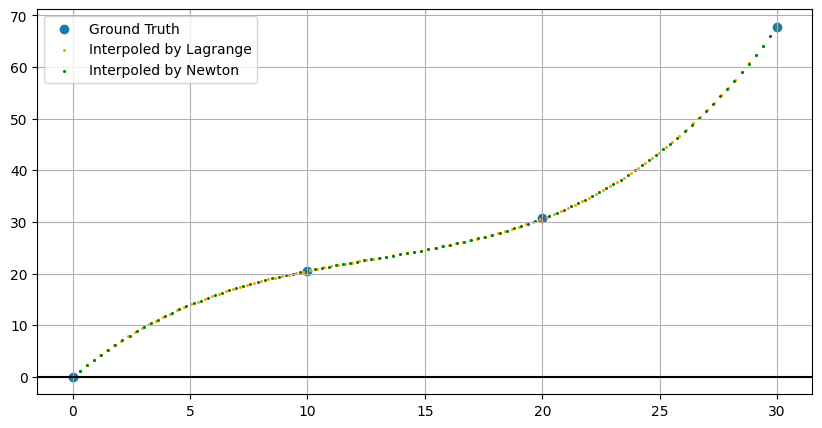

In [ ]:
xs_inter_lag = np.linspace(xs[0], xs[-1], 102)
ys_inter_lag = lagrange_method(xs, ys, xs_inter_lag)

xs_inter_newt = np.linspace(xs[0], xs[-1], 100)
ys_inter_newt = newton_method(xs, ys, xs_inter_newt)

fig = plt.figure(figsize=(10,5))
plt.axhline(y = 0, color="black")
plt.scatter(xs, ys, label="Ground Truth")
plt.scatter(xs_inter_lag, ys_inter_lag, s=1.5, label="Interpolated by Lagrange", color="orange")
plt.scatter(xs_inter_newt, ys_inter_newt, s=1.5, label="Interpolated by Newton", color="green")
plt.legend()
plt.grid()
plt.show()

### Conclusões

Tendo em vista o gráfico dos pontos apresentados pode-se inferir que os resultados retornados dos dois métodos foram satisfatórios para interpolar os pontos presentes na questão.

## Exercício 3

Seja a função de distribuição de probabilidade normal padrão definida por:

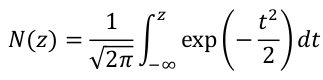

cujos valores são mostrados abaixo.

In [ ]:
xs = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], dtype=np.float32)
ys = np.array([0.5, 0.69146, 0.84134, 0.93319, 0.97725, 0.99379, 0.99865], dtype=np.float32)
x = 0.3

### a) Calcular Pn(0,3) utilizando polinômios interpoladores de graus n = 1, 2, 3, 4, 5 e 6

In [ ]:
for i in range(1, xs.shape[0]):
  print(f"Grau {i} (Lagrange): \tPn({x}) = {round(lagrange_method(xs[0:i], ys, x), 7)}")
  print(f"Grau {i} (Newton): \tPn({x}) = {round(newton_method(xs[0:i], ys, x), 7)}")

Grau 1 (Lagrange): 	Pn(0.3) = 0.5
Grau 1 (Newton): 	Pn(0.3) = 0.5
Grau 2 (Lagrange): 	Pn(0.3) = 0.614876
Grau 2 (Newton): 	Pn(0.3) = 0.614876
Grau 3 (Lagrange): 	Pn(0.3) = 0.6198656
Grau 3 (Newton): 	Pn(0.3) = 0.6198656
Grau 4 (Lagrange): 	Pn(0.3) = 0.6189444
Grau 4 (Newton): 	Pn(0.3) = 0.6189444
Grau 5 (Lagrange): 	Pn(0.3) = 0.6180476
Grau 5 (Newton): 	Pn(0.3) = 0.6180476
Grau 6 (Lagrange): 	Pn(0.3) = 0.617667
Grau 6 (Newton): 	Pn(0.3) = 0.617667


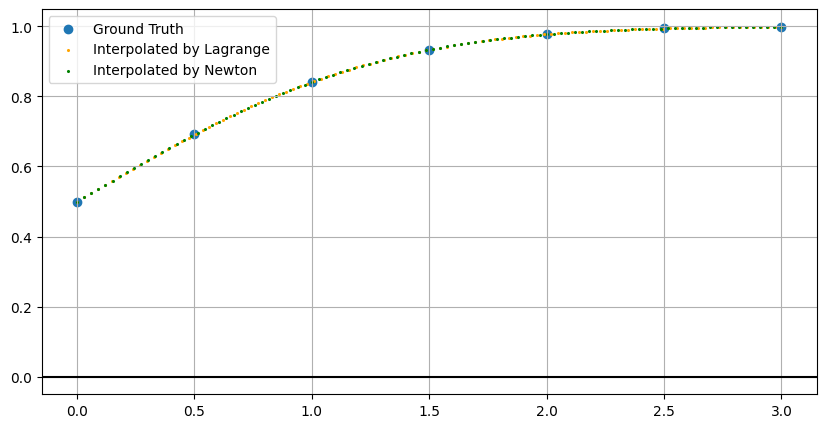

In [ ]:
xs_inter_lag = np.linspace(xs[0], xs[-1], 102)
ys_inter_lag = lagrange_method(xs, ys, xs_inter_lag)

xs_inter_newt = np.linspace(xs[0], xs[-1], 100)
ys_inter_newt = newton_method(xs, ys, xs_inter_newt)

fig = plt.figure(figsize=(10,5))
plt.axhline(y = 0, color="black")
plt.scatter(xs, ys, label="Ground Truth")
plt.scatter(xs_inter_lag, ys_inter_lag, s=1.5, label="Interpolated by Lagrange", color="orange")
plt.scatter(xs_inter_newt, ys_inter_newt, s=1.5, label="Interpolated by Newton", color="green")
plt.legend()
plt.grid()
plt.show()

### b) Interpolar z = 0,3, via Splines Cúbicas Naturais

### c) Comparar os resultados obtidos nas letras a e b com o valor tabela de z, N(z) = 0,8

## Exercício 4

A condutividade térmica do alumínio (6063-T5) foi medida em função da
temperatura, e os resultados são mostrados na tabela a seguir:

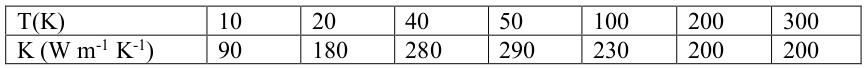

Use o método dos mínimos quadrados para calcular:

In [ ]:
xs = np.array([10,20,40,50,100,200,300], dtype=np.float32)
ys = np.array([90,180,280,290,230,200,200], dtype=np.float32)

### a) Um polinômio linear que estime k com função de T

In [ ]:
equation = linear_min_quadratic_method(xs, ys)

print(f"Equation -> {equation[0]} * x + {equation[1]}")

Equation -> 0.028351559335763468 * x + 207.0838396111786


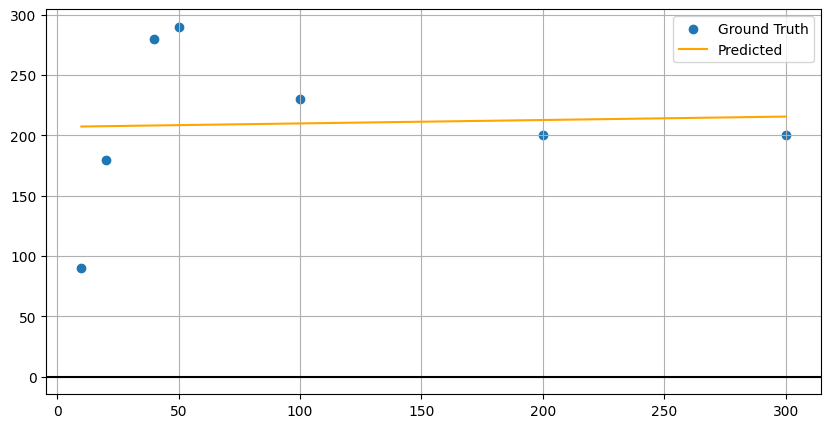

In [ ]:
f = lambda x: equation[0] * x + equation[1]

xs_pred = np.linspace(xs[0], xs[-1], 1000)
ys_pred = f(xs_pred)

fig = plt.figure(figsize=(10,5))
plt.axhline(y = 0, color="black")
plt.scatter(xs, ys, label="Ground Truth")
plt.plot(xs_pred, ys_pred, label="Predicted", color="orange")
plt.legend()
plt.grid()
plt.show()

### b) Um polinômio quadrático que faça prever a relação entre k e T

In [ ]:
equation = power_min_quadratic_method(xs, ys)

print(f"Equation -> {equation[1]} * x ** {equation[0]}")

Equation -> 104.05331548235083 * x ** 0.15848476867043618


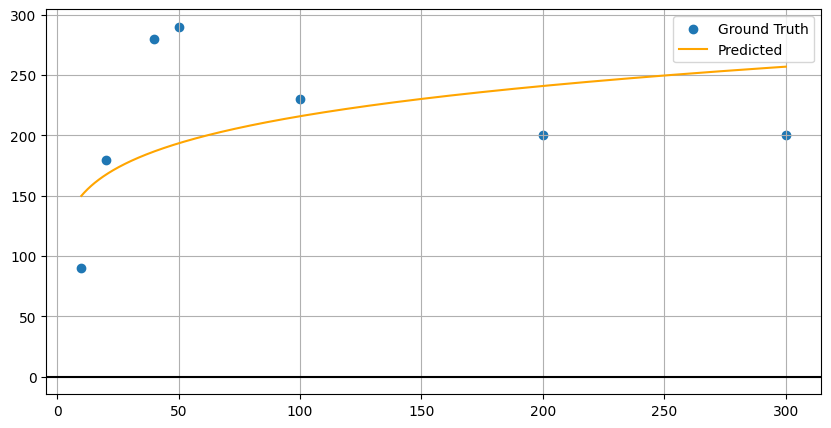

In [ ]:
f = lambda x: equation[1] * x ** equation[0]

xs_pred = np.linspace(xs[0], xs[-1], 1000)
ys_pred = f(xs_pred)

fig = plt.figure(figsize=(10,5))
plt.axhline(y = 0, color="black")
plt.scatter(xs, ys, label="Ground Truth")
plt.plot(xs_pred, ys_pred, label="Predicted", color="orange")
plt.legend()
plt.grid()
plt.show()

### c) Um polinômio cúbico que faça prever a relação entre k e T

In [ ]:
equation = power_min_quadratic_method(xs, ys)

print(f"Equation -> {equation[1]} * x ** {equation[0]}")

Equation -> 104.05331548235083 * x ** 0.15848476867043618


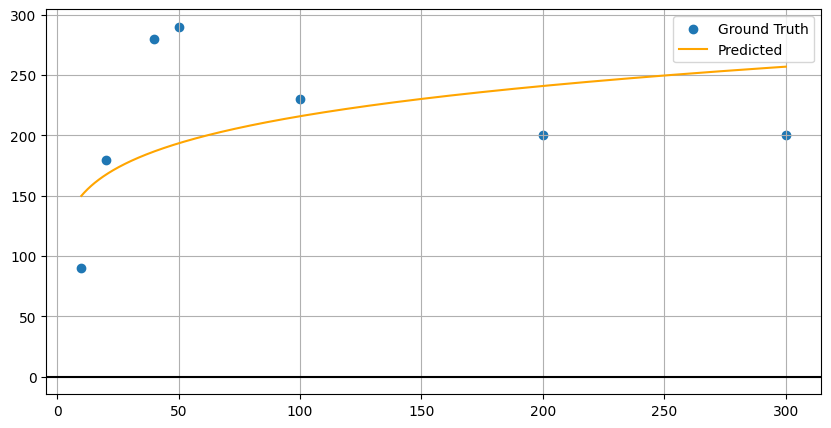

In [ ]:
f = lambda x: equation[1] * x ** equation[0]

xs_pred = np.linspace(xs[0], xs[-1], 1000)
ys_pred = f(xs_pred)

fig = plt.figure(figsize=(10,5))
plt.axhline(y = 0, color="black")
plt.scatter(xs, ys, label="Ground Truth")
plt.plot(xs_pred, ys_pred, label="Predicted", color="orange")
plt.legend()
plt.grid()
plt.show()